This notebook is used to visualize some of the probability distributions appearing in Lecture 7 of the course "An introduction to quantum entanglement", available at https://ion.nechita.net/2020-an-introduction-to-quantum-entanglement/

Please send remarks and comments regarding both this notebook and the lecture notes to nechita@irsamc.ups-tlse.fr

# Gaussian integration

A real Gaussian random variable $X$ with *mean* $m$ and *variance* $\sigma^2$ has probability density $$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x-m)^2}{2\sigma^2}\right)$$

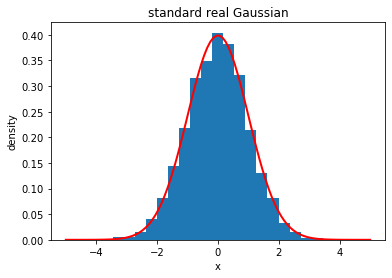

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats

m = 0
variance = 1
sigma = math.sqrt(variance)

x = np.linspace(m - 5*sigma, m + 5*sigma, 100)
y = scipy.stats.norm.pdf(x, m, sigma)

data = m + sigma * np.random.randn(5000)

plt.hist(data, 20, density=1)
plt.plot(x,y, linewidth=2.0, color='r')

plt.title('standard real Gaussian')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

In 2D, a standard *complex* Gaussian random variable has density $$f(z) = \frac{1}{\pi}\exp\left(-\frac{|z|^2}{2}\right)$$

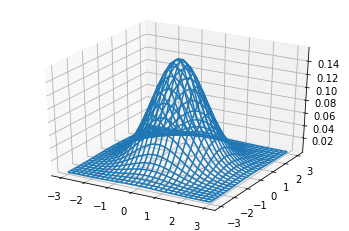

In [2]:
from mpl_toolkits.mplot3d import Axes3D


x, y = np.mgrid[-3.0:3.0:30j, -3.0:3.0:30j]
xy = np.column_stack([x.flat, y.flat])

m = np.array([0.0, 0.0])
covariance = np.diag(np.array([1, 1]))
z = scipy.stats.multivariate_normal.pdf(xy, mean=m, cov=covariance)

# Reshape back to a 2D array
z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z)
plt.show()

# Wishart random matrices

For integers $(d,s)$, an element of the *Wishart ensemble of parameters $(d,s)$* is a random matrix $W \in \mathcal M_d(\mathbb C)$ defined as follows. First, consider a random matrix $X$ (called a *Ginibre random matrix*), of size $d \times s$, having independent and identically distributed entries $X_{ij}$ which are standard complex Gaussian random variables. Then, set $W = XX^*$. The random matrix $W$ is positive semidefinite, and has almost surely rank $r=\min(d,s)$. 

In [3]:
def RandomGinibre(d, s):
    """ Creates a random complex Ginibre matrix of size d x s"""
    
    X = (np.random.randn(d, s) + 1.0j*np.random.randn(d, s))/math.sqrt(2);
    
    return X

def RandomWishart(d, s):
    """ Creates a sample from the Wishart ensemble of parameters (d,s). The resulting matrix is PSD of size d x d"""
    
    X = RandomGinibre(d, s)
    W = np.matmul(X, X.conj().transpose())
    
    return W

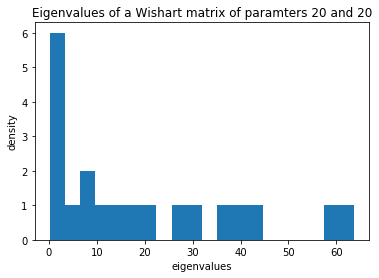

In [4]:
d = 20;
s = 20;
W = RandomWishart(d, s)

data = np.linalg.eigvalsh(W)

plt.hist(data, 20)
plt.title('Eigenvalues of a Wishart matrix of paramters ' + str(d) + ' and ' + str(s))
plt.xlabel('eigenvalues')
plt.ylabel('density')
plt.show()

For large matrix dimension $d$, when the parameter $s$ grows at linear speed $s \sim cd$ for some constant $c>0$, the *empirical eigenvalue distribution* (i.e. histogram shape) of a random Wishart matrix, normalized by $1/d$, is known to converge to the *Marchenko-Pastur distribution*
$$\pi_c=\max (1-c,0)\delta_0+\frac{\sqrt{(b-x)(x-a)}}{2\pi x} \; \mathbf{1}_{(a,b)}(x) \, \mathrm{d} x,$$
where $a = (1-\sqrt c)^2$ and $b=(1+\sqrt c)^2$ are the endpoints of the support.    

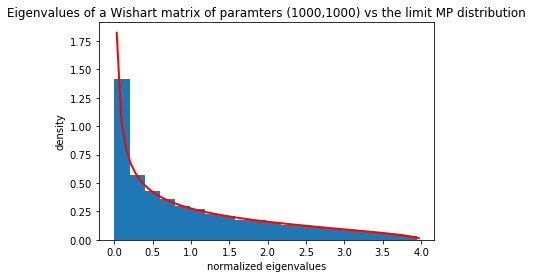

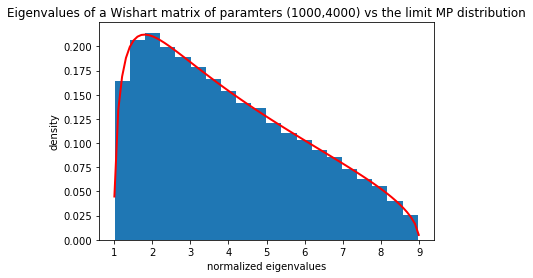

In [5]:
import warnings
warnings.filterwarnings('ignore')

d = 1000;

c = 1;
s = np.round(c*d);
W = RandomWishart(d, s) / d
data = np.linalg.eigvalsh(W)

a = (1-math.sqrt(c))**2
b = (1+math.sqrt(c))**2
x = np.linspace(a-1, b+1, 100)
y = np.sqrt((b-x)*(x-a))/(2*np.pi*x)

plt.hist(data, 20, density=1)
plt.plot(x,y, linewidth=2.0, color='r')
plt.title('Eigenvalues of a Wishart matrix of paramters (' + str(d) + ',' + str(s) + ') vs the limit MP distribution')
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

c = 4;
s = np.round(c*d);
W = RandomWishart(d, s) / d
data = np.linalg.eigvalsh(W)

c = s/d
a = (1-math.sqrt(c))**2
b = (1+math.sqrt(c))**2
x = np.linspace(a-1, b+1, 100)
y = np.sqrt((b-x)*(x-a))/(2*np.pi*x)

plt.hist(data, 20, density=1)
plt.plot(x,y, linewidth=2.0, color='r')
plt.title('Eigenvalues of a Wishart matrix of paramters (' + str(d) + ',' + str(s) + ') vs the limit MP distribution')
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

# Random density matrices and their partial transpose

Random denisty matrices (i.e. positive semidefinite matrices of unit trace) from the *induced ensemble* can be obtained by normalizing the trace of Wishart matrices:
$$\rho = \frac{W}{\mathrm{Tr}\, W},$$
where $W$ is a random Wishart matrix. 

*Separable states* are convex combinations of product states:
$$\mathcal{SEP} \ni \rho = \sum_{i=1}^r t_i \sigma_i^{(A)} \otimes \sigma_i^{(B)},$$
where $t_i \geq 0$, $\sum_i t_i = 1$, and $\sigma_i^{(A,B)}$ are quantum states. 

*PPT (positive partial transpose)* states are states that remain positive semidefinte under the partial trasposition operation:
$$\mathcal{PPT} = \{ \rho : \, | \, [\mathrm{id} \otimes \mathrm{transp}](\rho) \geq 0\}.$$

The following key inclusion holds
$$\mathcal{SEP}_{d,n} \subseteq \mathcal{PPT}_{d,n},$$
with equality iff $dn \leq 6$. Deciding whether a given matrix $\rho$ is separable is an NP-hard problem; deciding whether $\rho$ is PPT is as easy as computing eigenvalues. Hence, the $\mathcal{PPT}$ set is a tractable approximation of $\mathcal{SEP}$. 

**How good is this approximation for large $d,n$ ?**

We shall focus on the asymptotical ($d \to \infty$) spectrum of the partial transposition of a random quantum state, in two regimes:
- the *balanced regime*, where $n=d \to \infty$
- the *unbalanced regime*. where $n$ is fixed, and $d \to \infty$

In [6]:
"""
Test the partial transpose criterion for the (un-normalized) maximally entangled state
Compute the eigenvalues of the output to show that omega is not PPT, and thus entangled
"""
omega = [
    [1,0,0,1],
    [0,0,0,0],
    [0,0,0,0],
    [1,0,0,1]
]

# Import the QuTiP library to perform the partial transposition operation
import qutip

omega = qutip.Qobj(omega)
omega.dims = [[2,2], [2,2]]
print('omega = ' + str(omega))

omegaPT = qutip.partial_transpose(omega, [0, 1])
print('OmegaPT = ' + str(omegaPT))

print('Eigenvalues of the partial transpose: ' + str(np.linalg.eigvalsh(omegaPT.full())))        

omega = Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
OmegaPT = Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
Eigenvalues of the partial transpose: [-1.  1.  1.  1.]


# The balanced regime

In the *balanced regime*, we consider random quantum states acting on $\mathbb C^d \otimes \mathbb C^d$, obtained by normalizing Wishart matrices of parameters $(d^2, cd^2)$, for some fixed value of $c$. Aubrun has shown that the empirical eigenvalue distribution of $\rho^\Gamma$ converges to a *semi-circular distribution* of parameters $(c,c)$, having denisity
$$\mu_{SC(c,c)} = \frac{\sqrt{4c-(x-c)^2}}{2\pi c} \mathbf{1}_{[c-2\sqrt c, c+2\sqrt c]}(x) \mathrm d x.$$
The measure above has positive support iff $c > 2 \sqrt c \iff c >4$.

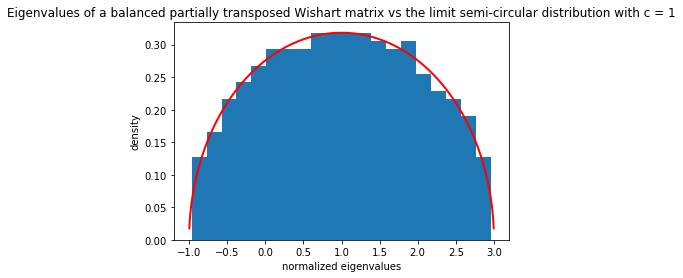

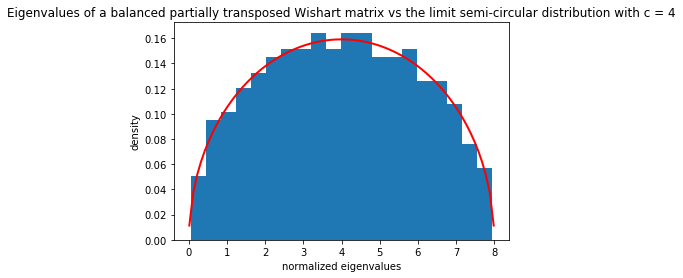

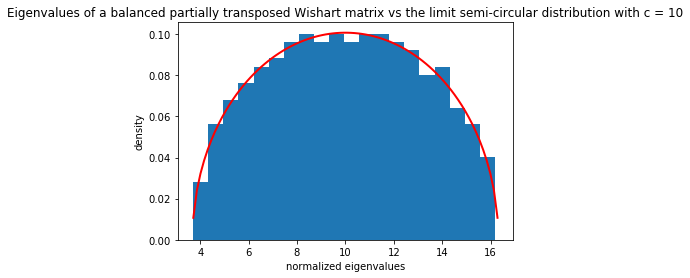

In [7]:
d = 20;

c = 1;
s = np.round(c*d**2);
W = RandomWishart(d**2, s) / d**2
W = qutip.Qobj(W)
W.dims = [[d,d], [d,d]]
WPT = qutip.partial_transpose(W, [0, 1])
data = np.linalg.eigvalsh(WPT.full())

a = c-2*np.sqrt(c);
b = c+2*np.sqrt(c);
x = np.linspace(a-1, b+1, 1000)
y = np.sqrt(4*c-(x-c)**2)/(2*np.pi*c)

plt.hist(data, 20, density=1)
plt.plot(x,y, linewidth=2.0, color='r')
plt.title('Eigenvalues of a balanced partially transposed Wishart matrix vs '
          'the limit semi-circular distribution with c = ' + str(c))
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

c = 4;
s = np.round(c*d**2);
W = RandomWishart(d**2, s) / d**2
W = qutip.Qobj(W)
W.dims = [[d,d], [d,d]]
WPT = qutip.partial_transpose(W, [0, 1])
data = np.linalg.eigvalsh(WPT.full())

a = c-2*np.sqrt(c);
b = c+2*np.sqrt(c);
x = np.linspace(a-1, b+1, 100)
y = np.sqrt(4*c-(x-c)**2)/(2*np.pi*c)

plt.hist(data, 20, density=1)
plt.plot(x,y, linewidth=2.0, color='r')
plt.title('Eigenvalues of a balanced partially transposed Wishart matrix vs '
          'the limit semi-circular distribution with c = ' + str(c))
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

c = 10;
s = np.round(c*d**2);
W = RandomWishart(d**2, s) / d**2
W = qutip.Qobj(W)
W.dims = [[d,d], [d,d]]
WPT = qutip.partial_transpose(W, [0, 1])
data = np.linalg.eigvalsh(WPT.full())

a = c-2*np.sqrt(c);
b = c+2*np.sqrt(c);
x = np.linspace(a-1, b+1, 100)
y = np.sqrt(4*c-(x-c)**2)/(2*np.pi*c)

plt.hist(data, 20, density=1)
plt.plot(x,y, linewidth=2.0, color='r')
plt.title('Eigenvalues of a balanced partially transposed Wishart matrix vs '
          'the limit semi-circular distribution with c = ' + str(c))
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

# The unbalanced regime

In the unbalanced regime, one of the two dimensions of the bi-partite quantum state is being kept fixed: $\rho \in \mathcal M_{dn}(\mathbb C)$, with $d \to \infty$ and $n$ fixed. The limiting eigenvalue distribution of the partial transposition $\rho^\Gamma$ is described with the help of *free probability theory*

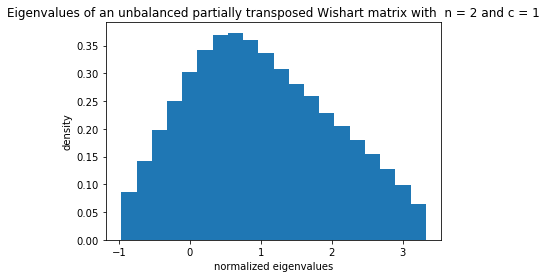

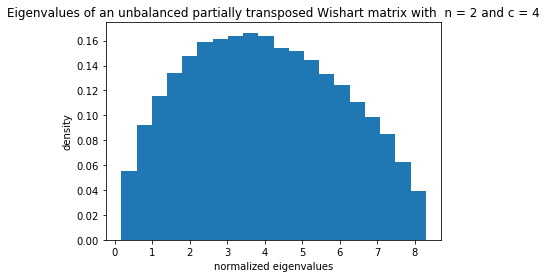

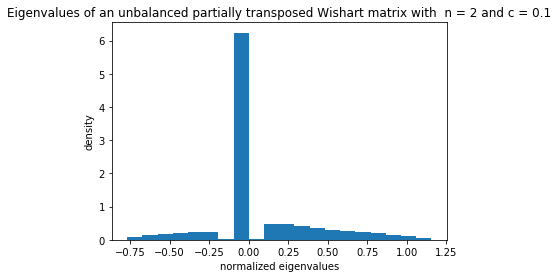

In [8]:
d = 1000;
n = 2;

c = 1;
s = int(c*d*n);
W = RandomWishart(d*n, s) / (d*n)
W = qutip.Qobj(W)
W.dims = [[d,n], [d,n]]
WPT = qutip.partial_transpose(W, [0, 1])
data = np.linalg.eigvalsh(WPT.full())

plt.hist(data, 20, density=1)
plt.title('Eigenvalues of an unbalanced partially transposed Wishart matrix with '
          ' n = ' + str(n) + ' and c = ' + str(c))
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

c = 4;
s = int(c*d*n);
W = RandomWishart(d*n, s) / (d*n)
W = qutip.Qobj(W)
W.dims = [[d,n], [d,n]]
WPT = qutip.partial_transpose(W, [0, 1])
data = np.linalg.eigvalsh(WPT.full())

plt.hist(data, 20, density=1)
plt.title('Eigenvalues of an unbalanced partially transposed Wishart matrix with '
          ' n = ' + str(n) + ' and c = ' + str(c))
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()

c = 0.1;
s = int(c*d*n);
W = RandomWishart(d*n, s) / (d*n)
W = qutip.Qobj(W)
W.dims = [[d,n], [d,n]]
WPT = qutip.partial_transpose(W, [0, 1])
data = np.linalg.eigvalsh(WPT.full())

plt.hist(data, 20, density=1)
plt.title('Eigenvalues of an unbalanced partially transposed Wishart matrix with '
          ' n = ' + str(n) + ' and c = ' + str(c))
plt.xlabel('normalized eigenvalues')
plt.ylabel('density')
plt.show()